# Atelier 3: Prétraitement des données

Question 1:

In [2]:
import pandas as pd
df = pd.DataFrame({'A': [0,0,0,0,0,1,1],
'B': [1,2,3,5,4,2,5],
'C': [5,3,4,1,1,2,3]})
a_group_desc = df.groupby('B').describe()
unstacked = a_group_desc.unstack()
print(unstacked)

          B
A  count  1    1.0
          2    2.0
          3    1.0
          4    1.0
          5    2.0
              ... 
C  max    1    5.0
          2    3.0
          3    4.0
          4    1.0
          5    3.0
Length: 80, dtype: float64


groupby('B') : Regroupe le DataFrame selon les valeurs uniques de la colonne 'B'.

describe() : Fournit des statistiques récapitulatives (comme count, mean, std, min, max, etc.) pour chaque groupe créé par groupby.

unstack() : Réorganise les résultats hiérarchiques de groupby + describe en un format aplati avec des colonnes, pour une lecture plus facile.

Question 2:

In [8]:
import pandas as pd
# Exemple de jeu de données
data = {
'Nom': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
'Age': [25, 30, 35, 25, 30],
'Ville': ['Paris', 'Lyon', 'Marseille', 'Paris', 'Lyon']
}
# Création d'un DataFrame
df = pd.DataFrame(data)
# Affichage du DataFrame original
print("DataFrame original :")
print(df)
db = df.duplicated()
print(df[db])
df_new = df.drop_duplicates()
print(df_new)

df_new_nom = df.drop_duplicates(subset='Nom')
print(df_new_nom)

DataFrame original :
       Nom  Age      Ville
0    Alice   25      Paris
1      Bob   30       Lyon
2  Charlie   35  Marseille
3    Alice   25      Paris
4      Bob   30       Lyon
     Nom  Age  Ville
3  Alice   25  Paris
4    Bob   30   Lyon
       Nom  Age      Ville
0    Alice   25      Paris
1      Bob   30       Lyon
2  Charlie   35  Marseille
       Nom  Age      Ville
0    Alice   25      Paris
1      Bob   30       Lyon
2  Charlie   35  Marseille


a) Rôle des méthodes :

duplicated() : Identifie les lignes dupliquées dans le DataFrame en renvoyant un tableau de booléens.


drop_duplicates() : Supprime les lignes dupliquées, en conservant la première occurrence par défaut.

Question 3:

In [12]:
import pandas as pd
import numpy as np
s = pd.Series([1, 2, 3, np.NaN, 5, 6, None])
print("Visualiser les données manquantes : true means a detection of a missing data")
print (s.isnull())
print ("Isoler les données manquantes")
print(s[s.isnull()])
print(s.fillna(int(s.mean())))
print(s.dropna())

Visualiser les données manquantes : true means a detection of a missing data
0    False
1    False
2    False
3     True
4    False
5    False
6     True
dtype: bool
Isoler les données manquantes
3   NaN
6   NaN
dtype: float64
0    1.0
1    2.0
2    3.0
3    3.0
4    5.0
5    6.0
6    3.0
dtype: float64
0    1.0
1    2.0
2    3.0
4    5.0
5    6.0
dtype: float64


fillna() : Remplace les valeurs manquantes (NaN ou None) dans une série ou un DataFrame par une valeur spécifiée. Ici, elle remplace les valeurs manquantes avec la moyenne des valeurs non manquantes de la série.

dropna() : Supprime les lignes (ou les valeurs dans une série) contenant des données manquantes (NaN ou None) et retourne les données restantes sans les valeurs manquantes.

Question4:

In [46]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  # Use SimpleImputer instead of Imputer

# Create an empty dataset
df = pd.DataFrame()

# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051, 0.4949, 0.6974, 0.3769, 0.2231, 0.341, 0.4436, 0.5897, 0.6308, 0.5]
df['x1'] = [np.nan, 0.2654, 0.2615, 0.5846, 0.4615, 0.8308, 0.4962, 0.3269, 0.5346, 0.6731]

# View the dataset
print("Data:")
print(df)

# Create an imputer object that looks for 'NaN' values, then replaces them with the mean value of the feature
print("Chercher les valeurs manquantes par la moyenne de la colonne")

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean', axis=0)

# Apply the imputer on the df dataset
mean_imputer = mean_imputer.fit(df)

# Apply the transformation
imputed_df = mean_imputer.transform(df)

# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed_df, columns=df.columns)

# View the dataset after imputation
print("Data après imputation:")
print(imputed_df)


Data:
       x0      x1
0  0.3051     NaN
1  0.4949  0.2654
2  0.6974  0.2615
3  0.3769  0.5846
4  0.2231  0.4615
5  0.3410  0.8308
6  0.4436  0.4962
7  0.5897  0.3269
8  0.6308  0.5346
9  0.5000  0.6731
Chercher les valeurs manquantes par la moyenne de la colonne


TypeError: SimpleImputer.__init__() got an unexpected keyword argument 'axis'

axis=0 : L'imputation se fait par colonne. Cela signifie que les valeurs manquantes dans une colonne donnée seront remplacées par une statistique (par exemple, la moyenne) calculée à partir des autres valeurs de cette colonne.


Question 5: 

In [49]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [2,1,2,3,3,5,4],'B': [1,2,3,5,4,2,5],
'C': [5,3,4,1,1,2,3]})
print(df)
print("Le jeu de données est trié selon la colonne 'A'")
df = df.sort_index(by=['A'], ascending=[True])
df = df.reset_index(drop=True)
print (df)
index = df.index.tolist()
np.random.shuffle(index)
df = df.ix[index]
df = df.reset_index(drop=True)
print("Le jeu de données est mélangé")
print (df)

   A  B  C
0  2  1  5
1  1  2  3
2  2  3  4
3  3  5  1
4  3  4  1
5  5  2  2
6  4  5  3
Le jeu de données est trié selon la colonne 'A'


TypeError: DataFrame.sort_index() got an unexpected keyword argument 'by'

Le rôle de reset_index(drop=True) dans ton code est :

Réinitialiser les index : Elle attribue de nouveaux index à partir de 0 en fonction de l'ordre actuel des lignes.
drop=True : Cela empêche l'ancienne colonne d'index d'être ajoutée au DataFrame comme une nouvelle colonne, donc elle est entièrement remplacée.

Question 6: 

In [52]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Map': [0,0,0,1,1,2,2], 'Values': [1,2,3,5,4,2,5]})
df['Sum'] = df.groupby('Map')['Values'].transform(np.sum)
df['Moy'] = df.groupby('Map')['Values'].transform(np.mean)
print (df)

   Map  Values  Sum  Moy
0    0       1    6  2.0
1    0       2    6  2.0
2    0       3    6  2.0
3    1       5    9  4.5
4    1       4    9  4.5
5    2       2    7  3.5
6    2       5    7  3.5


C:\Users\merye\AppData\Local\Temp\ipykernel_5200\914739619.py:4: FutureWarning: The provided callable <function sum at 0x000002647EC998A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['Sum'] = df.groupby('Map')['Values'].transform(np.sum)
C:\Users\merye\AppData\Local\Temp\ipykernel_5200\914739619.py:5: FutureWarning: The provided callable <function mean at 0x000002647EC9A980> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df['Moy'] = df.groupby('Map')['Values'].transform(np.mean)


Dans ton exemple, 'Map' est utilisé comme une colonne de regroupement (ou "groupe") dans l'opération groupby(). Elle permet de diviser les données en groupes en fonction de ses valeurs. Ensuite, des calculs (comme la somme ou la moyenne) sont effectués sur chaque groupe séparément.

Question 7:

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
import numpy as np
iris_nparray = iris.data
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in
iris.target],
dtype="category")
print("IRIS data values:")
print(iris_dataframe)
print("Mean value :")
print (iris_dataframe.mean(numeric_only=True))
print("Median value :")
print (iris_dataframe.median(numeric_only=True))
print("Discrétisation basée sur des effectifs égaux (ou quantiles) :")
print(iris_dataframe.quantile(np.array([0,.25,.50,.75,1])))
#Le binning transforme les variables numériques en variables catégoriques
iris_binned = pd.concat([
pd.qcut(iris_dataframe.iloc[:,0], [0, .25, .5, .75, 1]),
pd.qcut(iris_dataframe.iloc[:,1], [0, .25, .5, .75, 1]),
pd.qcut(iris_dataframe.iloc[:,2], [0, .25, .5, .75, 1]),
pd.qcut(iris_dataframe.iloc[:,3], [0, .25, .5, .75, 1]),
], join='outer', axis = 1)
print("Bining IrisData")
print(iris_binned)
#obtenir une fréquence pour chaque variable catégorique de l'ensemble de données
print("Fréquence dans chanque catégorie")
print (iris_dataframe['group'].value_counts())
print("Fréquence pour chaque marge de valeurs")
print (iris_binned['petal length (cm)'].value_counts())

IRIS data values:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         

AssertionError: 

La méthode qcut() discrétise les données en fonction des quantiles, garantissant des groupes avec un nombre égal d'observations. Elle est idéale pour diviser les données en intervalles égaux en termes de fréquence. En revanche, cut() divise les données en intervalles de taille égale en termes de valeur, sans garantir un nombre égal d'observations dans chaque intervalle.

Question 8:

Les scores de corrélation des features :
chi2 score  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
F - score score  [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
mutual info  [0.49848267 0.23114139 0.99059987 0.98807254]


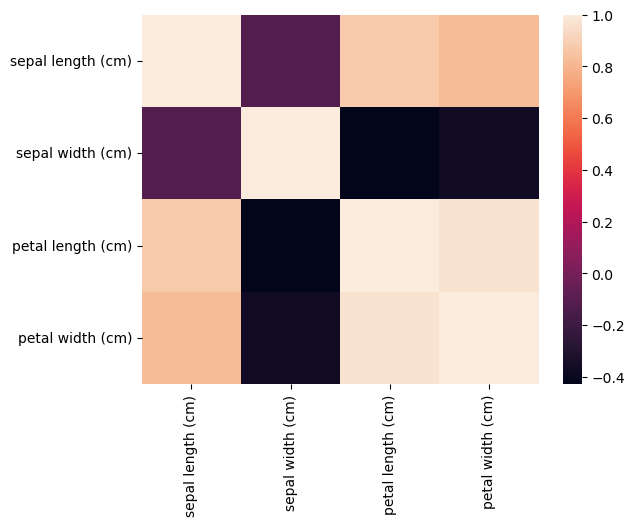

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)
print("Les scores de corrélation des features :")
print('chi2 score ', chi2_score)
print('F - score score ', f_score)
print('mutual info ', mut_info_score)
dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
corr = dataframe.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)
plt.show()

Cette heatmap montre les corrélations entre les caractéristiques de fleurs (longueur/largeur des sépales et pétales). Les couleurs claires indiquent une forte corrélation positive, comme entre la longueur et la largeur des pétales, tandis que les couleurs sombres montrent des corrélations négatives ou faibles, comme entre la largeur du sépale et la longueur du pétale.

Variance expliquée par chaque composante : [0.72962445 0.22850762]
   Composante 1  Composante 2  Classe
0     -2.264703      0.480027       0
1     -2.080961     -0.674134       0
2     -2.364229     -0.341908       0
3     -2.299384     -0.597395       0
4     -2.389842      0.646835       0


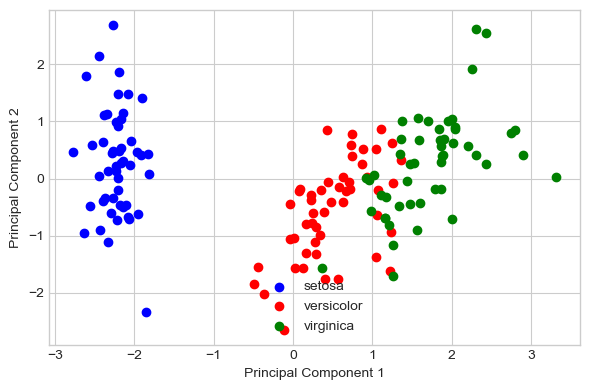

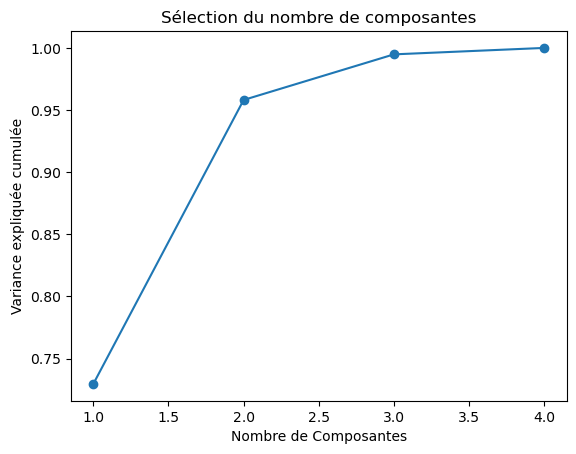

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

# Charger un jeu de données Iris
data = load_iris()
X = data.data  # Caractéristiques
y = data.target  # Étiquettes

# Étape 1 : Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 2 : Appliquer la PCA
pca = PCA(n_components=2)  # Choisir le nombre de composantes principales
X_pca = pca.fit_transform(X_scaled)

# Étape 3 : Afficher la variance expliquée par chaque composante
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)

# Étape 4 : Convertir en DataFrame pour visualiser les nouvelles caractéristiques
df_pca = pd.DataFrame(X_pca, columns=['Composante 1', 'Composante 2'])
df_pca['Classe'] = y
print(df_pca.head())

# Plot graphique d’observation des données
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2), ('blue', 'red', 'green')):
        plt.scatter(X_pca[y == lab, 0], X_pca[y == lab, 1], label=data.target_names[lab], c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# Graphique de la variance expliquée cumulée
pca_full = PCA().fit(X_scaled)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Sélection du nombre de composantes')
plt.show()
